In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [186]:
# Read in CSV
crypto_df = pd.read_csv("crypto_data.csv")

crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,42.0000,42
1,365,365Coin,X11,True,PoW/PoS,nan,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1055184902.0400,532000000
3,611,SixEleven,SHA-256,True,PoW,nan,611000
4,808,808,SHA-256,True,PoW/PoS,0.0000,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,128326.9963,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,21491213.4644,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,nan,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,nan,21000000


In [187]:
#Review dataframe to identify columns with null values (i.e. TotalCoinsMined)
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [188]:
# Filter currencies that are currently being traded'
new_crypto_df = pd.DataFrame(crypto_df)
# Use query to reduce dataframe to IsTrading = True and remove coins that are not being mined
# Using the query in this way will also remove the rows with NAN values in TotalCoinsMined column
new_crypto_df.query('IsTrading == True & TotalCoinsMined > 0', inplace=True)

new_crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,42.0000,42
2,404,404Coin,Scrypt,True,PoW/PoS,1055184902.0400,532000000
5,1337,EliteCoin,X13,True,PoW/PoS,29279424622.5027,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,17927175.0000,21000000
8,ETH,Ethereum,Ethash,True,PoW,107684222.6865,0
...,...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,True,DPoS,1999999995.3056,2000000000
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,14931046.1547,250000000
1245,BDX,Beldex,CryptoNight,True,PoW,980222595.0000,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7296537.5000,21000000


In [189]:
#review new dataframe to verify that there are no null values.
new_crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   IsTrading        532 non-null    bool   
 4   ProofType        532 non-null    object 
 5   TotalCoinsMined  532 non-null    float64
 6   TotalCoinSupply  532 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 29.6+ KB


In [190]:
#Create a dataframe of Coin Names to be used for labeling if needed.
coin_name = new_crypto_df[['CoinName']]

coin_name

,CoinName
0,42 Coin
2,404Coin
5,EliteCoin
7,Bitcoin
8,Ethereum
...,...
1238,ZEPHYR
1242,Gapcoin
1245,Beldex
1246,Horizen


In [191]:
# Drop IsTrading, unnamed: 0, and CoinName columns from the dataframe
reduced_df = new_crypto_df.drop(['Unnamed: 0', 'IsTrading', 'CoinName'], axis=1)

reduced_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,42.0000,42
2,Scrypt,PoW/PoS,1055184902.0400,532000000
5,X13,PoW/PoS,29279424622.5027,314159265359
7,SHA-256,PoW,17927175.0000,21000000
8,Ethash,PoW,107684222.6865,0
...,...,...,...,...
1238,SHA-256,DPoS,1999999995.3056,2000000000
1242,Scrypt,PoW/PoS,14931046.1547,250000000
1245,CryptoNight,PoW,980222595.0000,1400222610
1246,Equihash,PoW,7296537.5000,21000000


In [192]:
#Convert columns totalCoinsMined and TotalCoinSupply to numeric using astype
reduced_df['TotalCoinSupply'] = reduced_df['TotalCoinSupply'].astype(float)

reduced_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,42.0000,42.0000
2,Scrypt,PoW/PoS,1055184902.0400,532000000.0000
5,X13,PoW/PoS,29279424622.5027,314159265359.0000
7,SHA-256,PoW,17927175.0000,21000000.0000
8,Ethash,PoW,107684222.6865,0.0000
...,...,...,...,...
1238,SHA-256,DPoS,1999999995.3056,2000000000.0000
1242,Scrypt,PoW/PoS,14931046.1547,250000000.0000
1245,CryptoNight,PoW,980222595.0000,1400222610.0000
1246,Equihash,PoW,7296537.5000,21000000.0000


In [193]:
# Use get_dummies to convert string values to numeric
final_crypto = pd.get_dummies(reduced_df)

final_crypto

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,42.0000,42.0000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1055184902.0400,532000000.0000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,29279424622.5027,314159265359.0000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,17927175.0000,21000000.0000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,107684222.6865,0.0000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,1999999995.3056,2000000000.0000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,14931046.1547,250000000.0000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,980222595.0000,1400222610.0000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7296537.5000,21000000.0000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Using get_dummies expanded the features from 4 to 98.

In [194]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_crypto)


In [195]:
# Create a DataFrame with the transformed data
scaled_crypto = pd.DataFrame(scaled_data, columns=final_crypto.columns[0:])
scaled_crypto

scaled_crypto

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.1171,-0.1529,-0.0434,-0.0434,-0.0434,-0.0614,-0.0753,-0.0434,-0.0614,-0.0614,...,1.4222,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434
1,-0.0940,-0.1450,-0.0434,-0.0434,-0.0434,-0.0614,-0.0753,-0.0434,-0.0614,-0.0614,...,1.4222,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434
2,0.5249,4.4894,-0.0434,-0.0434,-0.0434,-0.0614,-0.0753,-0.0434,-0.0614,-0.0614,...,1.4222,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434
3,-0.1167,-0.1526,-0.0434,-0.0434,-0.0434,-0.0614,-0.0753,-0.0434,-0.0614,-0.0614,...,-0.7031,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434
4,-0.1147,-0.1529,-0.0434,-0.0434,-0.0434,-0.0614,-0.0753,-0.0434,-0.0614,-0.0614,...,-0.7031,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,-0.0733,-0.1233,-0.0434,-0.0434,-0.0434,-0.0614,-0.0753,-0.0434,-0.0614,-0.0614,...,-0.7031,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434
528,-0.1168,-0.1492,-0.0434,-0.0434,-0.0434,-0.0614,-0.0753,-0.0434,-0.0614,-0.0614,...,1.4222,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434
529,-0.0956,-0.1322,-0.0434,-0.0434,-0.0434,-0.0614,-0.0753,-0.0434,-0.0614,-0.0614,...,-0.7031,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434
530,-0.1169,-0.1526,-0.0434,-0.0434,-0.0434,-0.0614,-0.0753,-0.0434,-0.0614,-0.0614,...,-0.7031,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434,-0.0434


In [196]:
# Perform dimensionality reduction with PCA.
# Initialize PCA model
pca = PCA(n_components=0.90)

# Get principal components for the data.
crypto_pca = pca.fit_transform(scaled_crypto)

In [197]:
# Transform PCA data to a DataFrame
crypto_pca_df = pd.DataFrame(
    data=crypto_pca
)
crypto_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.3351,1.0322,-0.5907,0.0014,-0.0000,-0.0000,0.0000,-0.0071,-1.3198,-0.0518,...,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000
1,-0.3184,1.0323,-0.5911,0.0014,-0.0000,-0.0000,0.0000,-0.0077,-1.3225,-0.0567,...,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000
2,2.3055,1.6564,-0.6836,0.0047,-0.0000,-0.0000,0.0000,-0.0548,-1.5429,-0.9440,...,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000
3,-0.1452,-1.3206,0.1928,-0.0012,0.0000,0.0000,-0.0000,-0.0021,0.2815,0.2519,...,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000
4,-0.1518,-2.0362,0.3962,-0.0017,0.0000,0.0000,-0.0000,0.0277,0.5191,0.1888,...,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000


Using PCA to perform dimensionality reduction reduced the number of features from 98 to 74.

In [198]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

In [202]:
# Run t-SNE
tsne = TSNE(learning_rate=300)
tsne_features = tsne.fit_transform(crypto_pca)

In [203]:
# Check that dimensions have been reduced to two
tsne_features.shape

(532, 2)

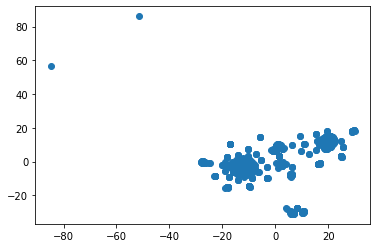

In [204]:
# Results colored by target value
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [205]:

inertia = []
# Same as k = list(range(1, 11))
k = list(range(1, 11))


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

df_elbow.head()

,k,inertia
0,1,46979.0752
1,2,45721.6236
2,3,44654.8460
3,4,43684.7955
4,5,43050.1880


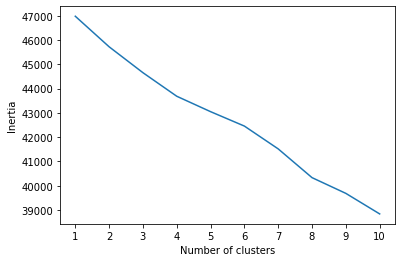

In [206]:
# Plot the elbow curve
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Recommendation:
Based on the results of the unsupervised machine analysis, there is no evidence that would suggest that crypto currencies can be clustered together. The results of both the t-sne and KMeans analysis do not indicate well formed clusters or an elbow curve that indicates that there is a "best" number of clusters. Therefore, my interpretation is that cryptocurrencies cannot be clustered together.